<link rel="stylesheet" href="stylesheet.css">

<body>


  <h1 class="title">Project 3</h1>
  <div class="container">
    <ul class="ul1">
      <li class="li_content">Task 1 : Read (.mat) data and describe it (channels, version, and ...) </li>
      <li class="li_content">Task 2 : Calculate important information like (sampling_frequency, neuron_activity_frequency, data_length[second, minute])</li>
      <ul class="ul2">
        <li class="sub_content">subtask 1 : print sampling frequency ⟶ 500 Hz</li>
        <li class="sub_content">subtask 2 : neuron activity frequency ⟶ by fast Fourier transform (FFT) </li>
        <li class="sub_content">subtask 3 : print data_length[second, minute]</li>
      </ul>
      <li class="li_content">Task 3 : show selected channel by user</li>
      <li class="li_content">Task 4 : get time start and time stop and calculate ⟶ [mean, standard deviation]</li>
      <li class="li_content">Task 5 : calculate statistical value and save dataset in CSV file </li>
    </ul>
  </div>
</body>



<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Task 1</h1>

In [1]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# import libraries :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

from scipy.io import loadmat  # Import function to read data.
from pylab import *  # Import numerical and plotting functions
from matplotlib import rcParams
from matplotlib import *
from matplotlib.pyplot import *
from cmath import sqrt
import pandas as pd
import numpy as np

# for calculate fast Fourier transform (for each row)
from scipy.fft import fft


rcParams["figure.figsize"] = (25, 5)  # Change the default figure size

In [2]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# read data (.mat)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

data = loadmat(
    "Dataset/EEG_P2090_processed.mat",
)  # Load the data,

# ￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭

# # read data frame with anothe library :
# from scipy.io import loadmat       # Import function to read data.
# data = loadmat("Dataset/EEG_P2090_processed.mat")

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# use "value()" method to visualize data structure :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

dict_values = data.values()
print(dict_values)

# len output : output number of keys
print(len(dict_values))

# python dict has no shape
print(np.shape(dict_values))

dict_values([b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jun 25 17:42:00 2023', '1.0', [], array([[ 0.08099003,  0.38671721,  0.85455762, ...,  0.20612061,
         0.1243387 ,  0.07913327],
       [ 0.06588963,  0.42519367,  0.91695394, ...,  0.25171279,
         0.33942146,  0.45061869],
       [ 0.14993292,  0.58781633,  1.04748039, ..., -0.07837302,
         0.25798247,  0.1771873 ],
       ...,
       [-0.52378222, -0.62752993, -0.66040078, ..., -0.49474289,
        -0.54995814, -0.58349074],
       [-0.58428771, -0.83443523, -0.97892268, ..., -0.33422464,
        -0.30624082, -0.30239014],
       [-0.25038106, -0.30457022, -0.38009657, ...,  0.04978373,
        -0.10943916, -0.1790117 ]])])
4
()


In [3]:
# print keys :
data.keys()

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# errors :

# problem 1 : data dont have any time column
# problem 2 : data dont have any channel dim (trial , samples , channels)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

dict_keys(['__header__', '__version__', '__globals__', 'EEG_P2090_processed'])

In [4]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# print headers & version & globals value :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████


header_value = data["__header__"]
version_value = data["__version__"]
globals_value = data["__globals__"]

print("Header:", header_value)
print("Version:", version_value)
print("Globals:", globals_value)

Header: b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Jun 25 17:42:00 2023'
Version: 1.0
Globals: []


In [5]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# get eeg data frame from dataset :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

eeg_np = data["EEG_P2090_processed"]

In [6]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# console data type
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

print(type(eeg_np))
print(np.shape(eeg_np), " ---- ", "number of samples : ", np.shape(eeg_np)[0], " ---- ", "number of pulse recording for (5 min) for each sample : ", np.shape(eeg_np)[1] )
print(len(eeg_np))

<class 'numpy.ndarray'>
(29, 150310)  ----  number of samples :  29  ----  number of pulse recording for (5 min) for each sample :  150310
29


In [7]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# convert data to pandas data frame and console head
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

eeg_df = pd.DataFrame(eeg_np)
eeg_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,150300,150301,150302,150303,150304,150305,150306,150307,150308,150309
0,0.080990,0.386717,0.854558,1.369273,1.775364,1.935024,1.790643,1.383621,0.844223,0.343582,...,0.444511,0.340075,0.254014,0.193008,0.176326,0.226059,0.256181,0.206121,0.124339,0.079133
1,0.065890,0.425194,0.916954,1.382788,1.678143,1.728797,1.560717,1.253190,0.899624,0.583561,...,0.466665,0.408453,0.314851,0.162314,0.026467,0.052920,0.163130,0.251713,0.339421,0.450619
2,0.149933,0.587816,1.047480,1.300042,1.227097,0.909543,0.524751,0.225350,0.051347,-0.043986,...,-0.434578,-0.021979,0.064616,-0.385328,-0.985117,-0.800041,-0.405910,-0.078373,0.257982,0.177187
3,0.026240,0.365052,0.825173,1.272238,1.575934,1.668481,1.545624,1.249665,0.848513,0.429484,...,0.015890,0.097779,0.181630,0.219542,0.211561,0.191608,0.184762,0.193439,0.206354,0.211864
4,-0.010890,0.328977,0.732773,1.041978,1.155536,1.079993,0.895540,0.683219,0.477345,0.278172,...,0.214292,0.297187,0.428909,0.586793,0.743199,0.859784,0.823283,0.598198,0.303084,0.089522
5,0.040865,0.295336,0.643897,0.989156,1.214826,1.284558,1.187309,0.966005,0.689165,0.427497,...,0.134530,0.073990,0.155315,0.398454,0.629160,0.504920,0.308681,0.216549,0.152678,0.313154
6,0.050745,0.387422,0.881173,1.405119,1.820377,2.034337,2.032027,1.856651,1.583896,1.297254,...,0.755454,0.609467,0.377186,0.096788,-0.135943,-0.203564,-0.124127,0.023485,0.185405,0.317972
7,0.152270,0.254412,0.328592,0.295240,0.126094,-0.120209,-0.344155,-0.466120,-0.469622,-0.397170,...,-1.161915,-1.026764,-0.811817,-0.675559,-0.683125,-0.764934,-0.691735,-0.352397,0.104523,0.444625
8,-0.401814,-0.468601,-0.469602,-0.365922,-0.213943,-0.128348,-0.070686,-0.041043,-0.053569,-0.038622,...,0.222534,0.182637,0.153528,0.255974,0.416903,0.379791,0.207622,0.032554,-0.188132,-0.275319
9,0.001473,0.115603,0.190641,0.158064,0.040921,-0.053626,-0.009927,0.189380,0.434094,0.554896,...,0.533785,0.540933,0.595412,0.711162,0.866807,1.003327,0.961023,0.685044,0.318719,0.127207


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Task 2</h1>

In [8]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate fast Fourier transform on rows :

# ￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭￭
# FFT or fast Fourier transform --- is for another lesson (no need for project_3)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# محاسبه تبدیل فوریه داده
fft_result = np.abs(fft(eeg_np))
# تعداد نقاط داده
n_trials = len(eeg_np)
# فرکانس‌های معادل با اعداد صحیح از 0 تا n-1
frequencies = np.fft.fftfreq(n_trials, 1.0)
# فرکانس‌های مثبت معادل با نصف اعداد صحیح مثبت
positive_frequencies = frequencies[: n_trials // 2]
# مقادیر مرتبط با فرکانس‌های مثبت
amplitudes = fft_result[: n_trials // 2]

# # big data to show:
# print(fft_result)
# print(frequencies)

print("n_trials length : ", n_trials)
print(np.shape(positive_frequencies))
print(np.shape(amplitudes))
print(" fft_result length : ", len(fft_result))
print(" fft_result shape : ", np.shape(fft_result))
print(" frequencies length : ", len(frequencies))
print(" n_trial : ", n_trials)

n_trials length :  29
(14,)
(14, 150310)
 fft_result length :  29
 fft_result shape :  (29, 150310)
 frequencies length :  29
 n_trial :  29


In [9]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate time for rows in second timeframe :
# device frequency : 500 Hz
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# تعداد نمونه‌ها
n_samples = eeg_df.shape[1]

# فرکانس نمونه‌برداری (هرتز)
sampling_frequency = 500

# مقیاس زمان به ثانیه برای هر نمونه
time_scale = 1 / sampling_frequency

# ایجاد ستون "Time" برای داده‌ها به وسیله مقیاس زمان
time_column = np.arange(0, n_samples) * time_scale

In [10]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# console test time (second and minute)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

print(time_column)
print(len(time_column))
print("Each trial test time (second) : ", time_column[-1])
# convert to minute timeframe
print("Each trial test time (minute) : ", time_column[-1] / 60)

[0.00000e+00 2.00000e-03 4.00000e-03 ... 3.00614e+02 3.00616e+02
 3.00618e+02]
150310
Each trial test time (second) :  300.618
Each trial test time (minute) :  5.0103


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Task 3</h1>

In [11]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# select channel by user :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# use widgets to get input data : 

import ipywidgets as widgets
from IPython.display import display

# define variable for get input :
global user_input
user_input = 1

# ایجاد یک ویجت ورودی عددی
number_input = widgets.IntText(
    value=1,  # مقدار پیشفرض
    description='channel :',
)

# تنظیم اندازه ویجت با استفاده از ویژگی layout
number_input.layout.width = "400px"  # تنظیم عرض به عنوان مثال
number_input.layout.height = "80px"  # تنظیم ارتفاع به عنوان مثال
number_input.layout.align_items = "center"

# نمایش ویجت در سلول نوت‌بوک
display(number_input)

# تابعی برای بروزرسانی مقدار user_input
def update_user_input(change):
    global user_input
    new_value = change.new
    # اعتبارسنجی مقدار ورودی
    if new_value < 1:
        print("Value cannot be less than 1.")
        number_input.value = user_input  # بازگرداندن به مقدار قبلی
    elif new_value > 30:
        print("Value cannot be greater than 30.")
        number_input.value = user_input  # بازگرداندن به مقدار قبلی
    else:
        user_input = new_value
        print("User input:", user_input)

# مانیتور کردن تغییرات در ویجت number_input و فراخوانی تابع بروزرسانی
number_input.observe(update_user_input, names="value")

IntText(value=1, description='channel :', layout=Layout(align_items='center', height='80px', width='400px'))

User input: 2
User input: 3
User input: 4
User input: 5
User input: 4
User input: 3
User input: 2
User input: 1
User input: 2
User input: 3
User input: 4
User input: 5
User input: 6
User input: 7
User input: 8
User input: 9
User input: 10
User input: 11


In [22]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# select user selected channel and show information :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# get selected channel from main data frame
channel = eeg_df.iloc[user_input, :]

# selected channel info :
print(len(channel))
print(np.shape(channel))
print(type(channel))
print(channel)

150310
(150310,)
<class 'pandas.core.series.Series'>
0        -0.322822
1        -0.424795
2        -0.480340
3        -0.448377
4        -0.330874
            ...   
150305    0.481516
150306    0.280317
150307    0.069438
150308   -0.169864
150309   -0.236038
Name: 11, Length: 150310, dtype: float64


In [13]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# get time range from user to split data : 
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# تعریف متغیرهای time_start و time_stop به عنوان متغیرهای global
global time_start, time_stop
time_start = 100
time_stop = 110

# ایجاد و نمایش ویجت IntRangeSlider برای انتخاب محدوده زمانی
time_range = widgets.IntRangeSlider(
    value=[time_start, time_stop],
    min=0,
    max=300,
    step=1,
    description='Time :',
    continuous_update=True,
)

# تنظیم اندازه ویجت با استفاده از ویژگی layout
time_range.layout.width = "100%"  # تنظیم عرض به عنوان مثال
time_range.layout.height = "150px"  # تنظیم ارتفاع به عنوان مثال
time_range.layout.align_items = "center"

# تابعی برای بروزرسانی متغیرهای time_start و time_stop
def update_time_range(change):
    global time_start, time_stop
    new_start, new_stop = change.new
    
        # اعتبارسنجی مقدار ورودی
    if ((new_stop - new_start) > 11):
        print("Error: The difference between time_start and time_stop cannot be greater than 10 seconds.")
        time_range.value = (time_start, time_stop)  # بازگرداندن به مقدار قبلی
    else:
        time_start, time_stop = new_start, new_stop

# متصل کردن تابع به ویجت
time_range.observe(update_time_range, names='value')

# نمایش ویجت در سلول نوت‌بوک
display(time_range)


IntRangeSlider(value=(100, 110), description='Time :', layout=Layout(align_items='center', height='150px', wid…

In [23]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# console time_stop and time_start
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

print(time_start)
print(time_stop)

290
300


In [24]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate time_start and time stop indexes :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

sample_index_start = int(time_start * sampling_frequency)
sample_index_stop = int(time_stop * sampling_frequency)

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# create subset with time_start and time_stop indexes :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

eeg_df_subset = eeg_df.iloc[:, sample_index_start : sample_index_stop + 1]
eeg_time_between = time_column[sample_index_start : sample_index_stop + 1]

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# get output for validate data structure :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# print(eeg_df_subset)
# print(eeg_time_between)
print("start input (second) : ", eeg_time_between[0])
print("end input (second) : ", eeg_time_between[-1])
print("start input index (int) : ", list(time_column).index(eeg_time_between[0]))
print("end input index (int) : ", list(time_column).index(eeg_time_between[-1]))
print(np.shape(eeg_df_subset))
print(np.shape(eeg_time_between))

start input (second) :  290.0
end input (second) :  300.0
start input index (int) :  145000
end input index (int) :  150000
(29, 5001)
(5001,)


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Task 4</h1>

In [25]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# calculate [mean , std , middle_value , Range_of_values]
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# create column_index list :
cols_index = np.arange(0, len(eeg_time_between), 1)
# re-index subset column_index of dataset :
eeg_df_subset.columns = cols_index
# get median values :
median_values = eeg_df_subset.median(axis=0)
# EEG range value :
range_values = eeg_df_subset.max(axis=0) - eeg_df_subset.min(axis=0)
# get n_trials
n_sample_trial = len(eeg_time_between)
# mean
mn = eeg_df_subset.mean(0)
# standard deviation
sd = eeg_df_subset.std(0)
# mean standard deviation
sdmn = sd / np.sqrt(n_sample_trial)

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# print length of sata :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

print(
    len(mn),
    len(sd),
    len(sdmn),
    len(median_values),
    len(range_values),
    len(eeg_time_between),
)

5001 5001 5001 5001 5001 5001


In [26]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# concat statistical data :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# convert to numpy array (better accuracy)
median_values = np.array(median_values)
range_values = np.array(range_values)
mn = np.array(mn)
sd = np.array(sd)
sdmn = np.array(sdmn)

# concat data :
statistical_array = np.vstack(
    (mn, sd, sdmn, median_values, range_values, eeg_time_between)
)

# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# print statistical matrix ([mean , std , middle_value , Range_of_values])
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

print(np.shape(statistical_array))

(6, 5001)


<h1 style="margin:20px auto 20px auto; width:95%; text-align:center; color:white; height:85px; font-size:45px; font-weight:bold; test-justify:center; background-color:darkblue;border-radius:2px ;padding-top:20px;">Task 5</h1>

In [27]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# convert numpy array into pandas data frame (add index and column_name)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

# index
column_indexes = np.arange(0, len(eeg_time_between), 1)

# column names :
row_indexes = [
    "mean",
    "standard_deviation",
    "mean_standard_deviation",
    "median_values",
    "value_range",
    "sample_time",
]

# convert matrix to data frame
main_df = pd.DataFrame(statistical_array, index=row_indexes, columns=column_indexes)

# get head before save csv file :
print(main_df.shape)
main_df.head()

(6, 5001)


,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
mean,-0.197862,-0.135794,-0.096403,-0.090738,-0.114896,-0.154285,-0.192146,-0.217437,-0.228292,-0.230343,...,0.376864,0.388315,0.361210,0.306795,0.248800,0.208532,0.191865,0.186177,0.169643,0.126615
standard_deviation,0.723860,0.771979,0.855151,0.924792,0.946425,0.912880,0.836820,0.740931,0.657989,0.629321,...,0.690753,0.679930,0.680904,0.690866,0.674344,0.645773,0.669789,0.752600,0.843760,0.938635
mean_standard_deviation,0.010236,0.010916,0.012092,0.013077,0.013383,0.012909,0.011833,0.010477,0.009304,0.008899,...,0.009768,0.009615,0.009628,0.009769,0.009536,0.009132,0.009471,0.010642,0.011931,0.013273
median_values,-0.126251,0.115453,0.346103,0.366911,0.329829,0.170235,-0.071497,-0.281200,-0.258859,-0.314733,...,0.307877,0.413264,0.255822,0.129955,0.020564,0.177053,0.139850,0.143908,0.270557,0.184472
value_range,2.269503,2.407035,2.737894,3.008880,3.193981,3.076028,2.853853,2.621653,2.573394,2.635166,...,2.849979,2.749978,2.579170,2.320034,2.251682,2.439952,2.746648,3.075622,3.301798,3.391968


In [28]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# save CSV file : (output_range.csv)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

main_df.to_csv("output_range.csv", index_label=False)

In [20]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# read csv file and get head :
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

df_read = pd.read_csv("output_range.csv")

# get head :
df_read.head()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
mean,-0.155632,-0.084561,-0.009082,0.030252,0.033278,-0.006043,-0.051560,-0.064480,-0.044822,0.019236,...,-0.472941,-0.366593,-0.247712,-0.118501,0.016914,0.150434,0.271840,0.373744,0.456074,0.526362
standard_deviation,0.635666,0.564972,0.530059,0.560593,0.598658,0.618787,0.621530,0.570069,0.464408,0.380002,...,0.820875,0.688414,0.568540,0.568519,0.726010,0.949159,1.160629,1.327606,1.441912,1.505063
mean_standard_deviation,0.008989,0.007989,0.007495,0.007927,0.008465,0.008750,0.008789,0.008061,0.006567,0.005374,...,0.011608,0.009735,0.008040,0.008039,0.010266,0.013422,0.016412,0.018773,0.020390,0.021283
median_values,-0.189390,-0.026840,0.066415,0.132870,0.042917,0.000222,-0.119721,-0.080186,-0.041189,0.150419,...,-0.655769,-0.391169,-0.164528,-0.056491,-0.103651,-0.066938,0.086026,0.314760,0.507954,0.714029
value_range,2.392526,2.348082,2.077912,2.160923,2.413464,2.555775,2.523524,2.341003,2.000800,1.518028,...,3.064463,2.766822,2.553493,2.522777,2.742738,3.360668,4.105592,4.431324,4.597226,4.928496


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_33595/1302293450.py:10: SyntaxWarning: invalid escape sequence '\m'
  ylabel("Voltage [$\mu$ V]")


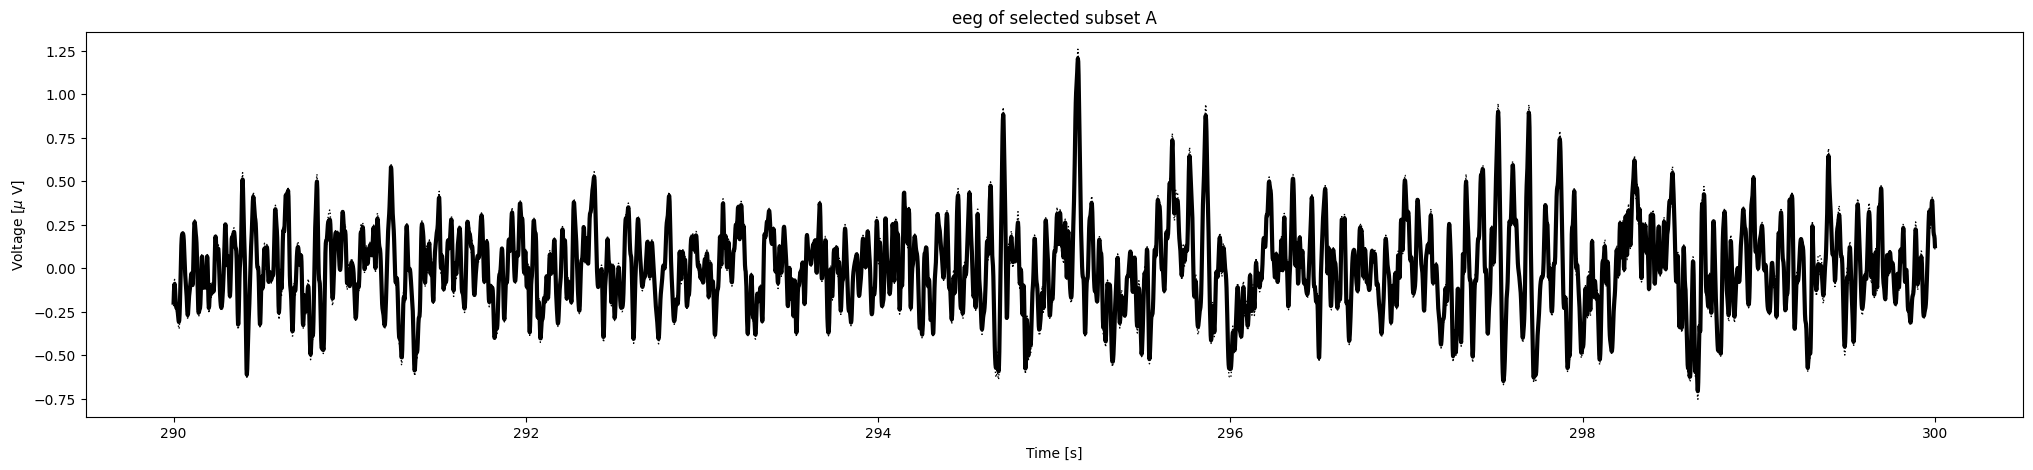

In [29]:
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████
# plot subset data : (time_start to time_stop)
# ██████████████████████████████████████████████████████████████████████████████████████████████████████████████

plot(eeg_time_between, mn, "k", lw=3)
plot(eeg_time_between, mn + 2 * sdmn, "k:", lw=1)
plot(eeg_time_between, mn - 2 * sdmn, "k:", lw=1)

xlabel("Time [s]")  # Label the axes,
ylabel("Voltage [$\mu$ V]")

title("eeg of selected subset A")  # ... provide a useful title,
savefig(f"./Plot/plot_between_{time_start}_and_{time_stop}_seconds")
show()